Importing all necessary packages

In [56]:
# cell 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.ensemble import BalancedRandomForestClassifier

Loading dataset (this is a csv file)

In [57]:
# cell 2
data = pd.read_csv("churn.csv")

Examining dataset structure:

Randomly choose 10 sample of them (total 10,000)

In [58]:
# cell 3
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7441,7442,15700549,Alvares,721,France,Male,54,5,0.00,2,1,1,4493.12,0
3227,3228,15639576,Burns,691,France,Male,26,9,136623.19,1,1,0,153228.00,0
8172,8173,15732293,Chia,759,Spain,Male,31,8,0.00,2,1,1,99086.74,0
1660,1661,15682356,Veltri,655,France,Female,37,7,111852.84,2,1,0,10511.13,0
7336,7337,15801072,Hurst,654,France,Female,28,7,0.00,2,1,0,151316.37,0
8737,8738,15780498,Maynard,634,France,Male,34,3,145030.92,1,1,1,41820.65,0
3699,3700,15577700,Rapuokwu,749,France,Male,37,10,185063.70,2,1,1,134526.87,0
4261,4262,15607278,Romano,794,Spain,Female,46,8,134593.79,1,1,1,46386.37,0
303,304,15624188,Chiu,712,France,Female,33,6,0.00,2,1,1,190686.16,0
762,763,15637876,Burns,663,Germany,Female,36,6,77253.50,1,0,0,35817.97,1


getting some statistical intuition from our dataset

In [53]:
# cell 4
data.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000
mean,-4.824585e-16,0.746300,0.545700,38.921800,5.012800,-6.252776e-17,1.530200,0.70550,0.515100,-2.877698e-17,0.203700
std,1.000050e+00,0.827529,0.497932,10.487806,2.892174,1.000050e+00,0.581654,0.45584,0.499797,1.000050e+00,0.402769
min,-3.109504e+00,0.000000,0.000000,18.000000,0.000000,-1.225848e+00,1.000000,0.00000,0.000000,-1.740268e+00,0.000000
25%,-6.883586e-01,0.000000,0.000000,32.000000,3.000000,-1.225848e+00,1.000000,0.00000,0.000000,-8.535935e-01,0.000000
50%,1.522218e-02,0.000000,1.000000,37.000000,5.000000,3.319639e-01,1.000000,1.00000,1.000000,1.802807e-03,0.000000
75%,6.981094e-01,1.000000,1.000000,44.000000,7.000000,8.199205e-01,2.000000,1.00000,1.000000,8.572431e-01,0.000000
max,2.063884e+00,2.000000,1.000000,92.000000,10.000000,2.795323e+00,4.000000,1.00000,1.000000,1.737200e+00,1.000000


Check if there are any missing values (NaN) ​​in the dataset.

In [55]:
# cell 5
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

result : there is no any NaN in dataset

Is there any duplicated sample in our dataset?

In [64]:
# cell 6
data.duplicated().sum()

np.int64(0)

result : also, there is no any duplicated sample in dataset

As we know, the 'RowNumber', 'CustomerId' and 'Surname' have no effect on leaving the bank or not.

Therefore, we can ignore them :

In [65]:
# cell 7
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

Now we want to check the relationship between other features with 'Exited' (whether he/she leaves the bank or not) of each sample.

1- How many of the total customers have left the bank during the last month?

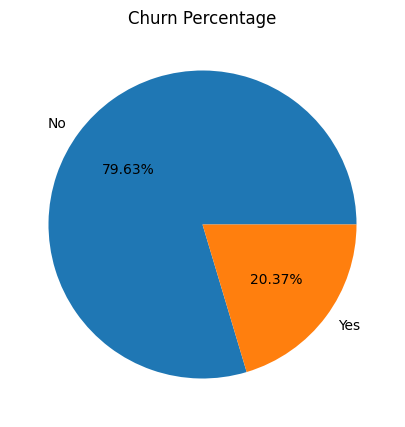

In [71]:
# cell 8
plt.figure(figsize=(15,5))
plt.pie(data['Exited'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('Churn Percentage')
plt.show()

Result : This chart indicates that only 20.4% of all our customers have blocked their accounts in the last month.

How many men and women are no longer bank customers?

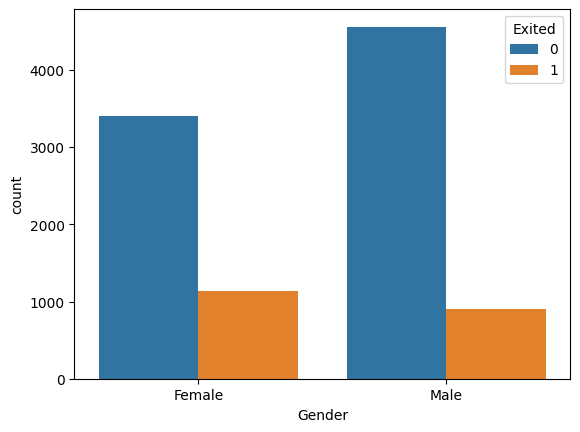

In [72]:
# cell 9
sns.countplot(x = 'Gender', data=data, hue='Exited')
plt.show()

Result : Most of our customers are men. but more women have left the bank. but this difference isn't so obvious.

Now let's check in which age range most of our customers are and whether there is more customer churn in a certain age range or not.

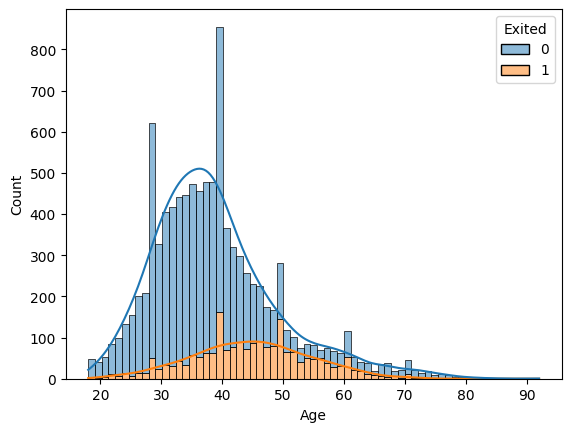

In [11]:
# cell 10
sns.histplot(data=data, x='Age', hue='Exited',multiple='stack', kde=True)
plt.show()

Result : As you see, most of our customers are young people between 30 and 40 years old. But most of the churn that the bank has faced have been in the age range of 40 to 50 years.

What effect does each person's credit score have on their leaving the bank?

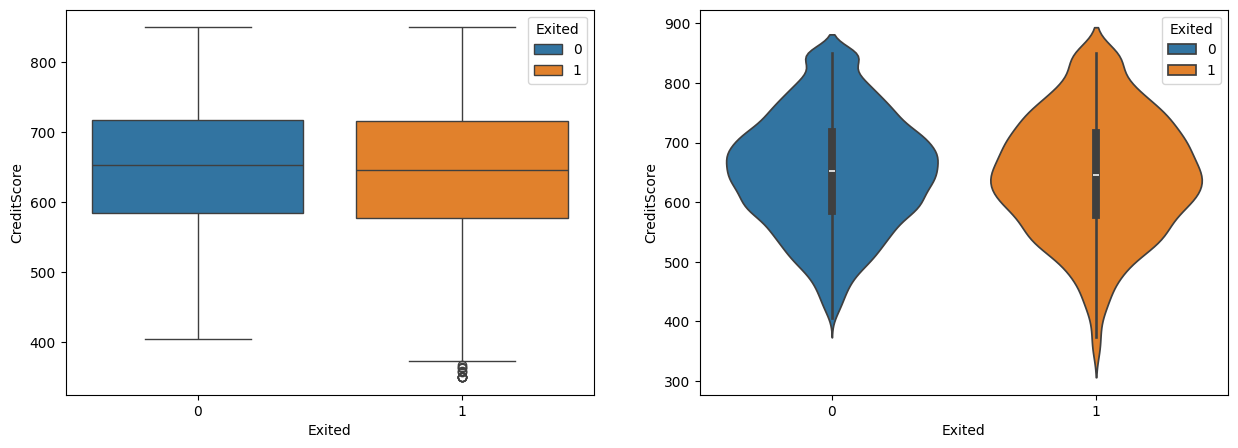

In [74]:
# cell 11
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='Exited', y='CreditScore', data=data, ax=ax[0], hue='Exited')
sns.violinplot(x='Exited', y='CreditScore', data=data, ax=ax[1], hue='Exited')
plt.show()

Result : Regarding the box plot, we can say that both the exited and non-exited groups have the same distribution around their credit scores.
The same is true for the violin plot. With a slight difference, it can be said that those who leave the bank have obtained a lower credit score.
But the final point of view: credit score has no effect on the churn of customers.

From which countries do we have customers and which country do most of our churn belong to?

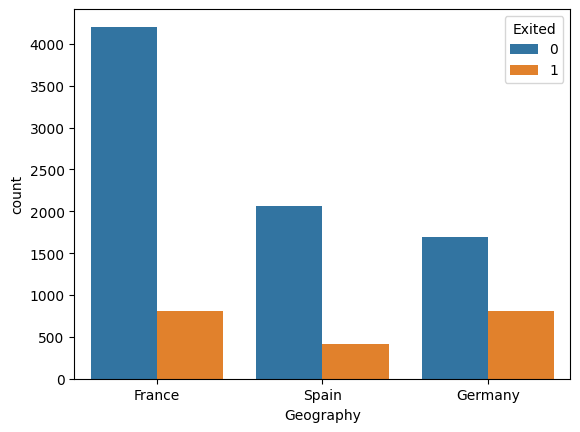

In [75]:
# cell 12
sns.countplot(x='Geography', hue='Exited', data=data)
plt.show()

Result : As you can see, most of our customers are dear French people, but in terms of churn, it can be said that Germans had the highest churn compared to their population in the bank. Two issues can be discussed.

1- Why are our German customers so few? (We are not in a position to investigate this issue)

2- why are German customers leaving our bank? Are they unhappy with our service or is there another reason?

Tenure refers to the time (in years) that a customer has been a client of the bank. It is better to check the loyalty of bank customers. (:

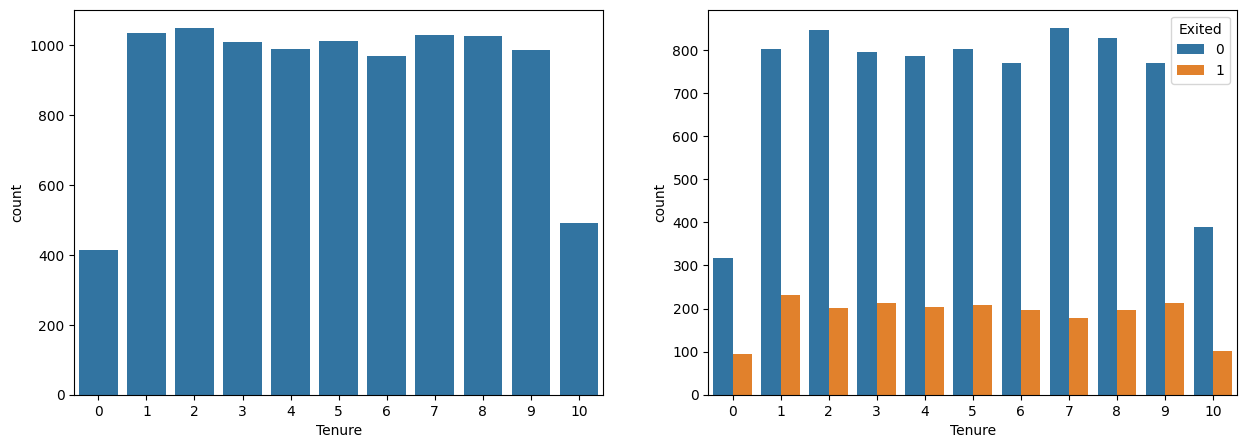

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='Tenure', data=data, ax=ax[0])
sns.countplot(x='Tenure', data=data, ax=ax[1], hue='Exited')
plt.show()

Result : Most of the customers have been with the bank for between 1 to 9 years. Now, these same customers have the largest drop among other customers. The reason for this should be investigated.

Bank Balance :

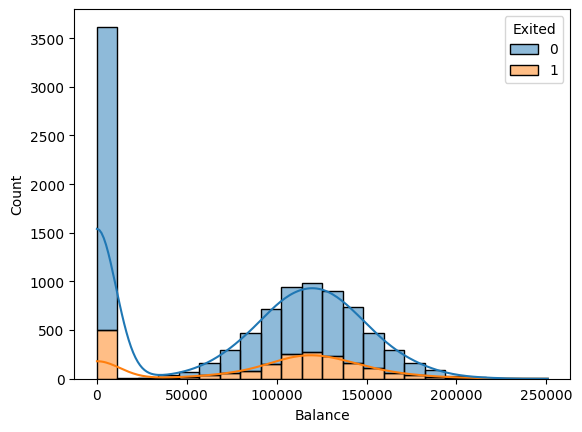

In [79]:
sns.histplot(data=data, x='Balance', hue='Exited', multiple='stack', kde=True)
plt.show()

Result : A huge number of customers have zero bank balance which resulted in them leaving the bank. Also, customers with bank balances between 100,000 and 150,000 have seen the biggest churn in the past month.

We assume that the number of products that the bank provides to customers has a opposite effect on the churn of customers:

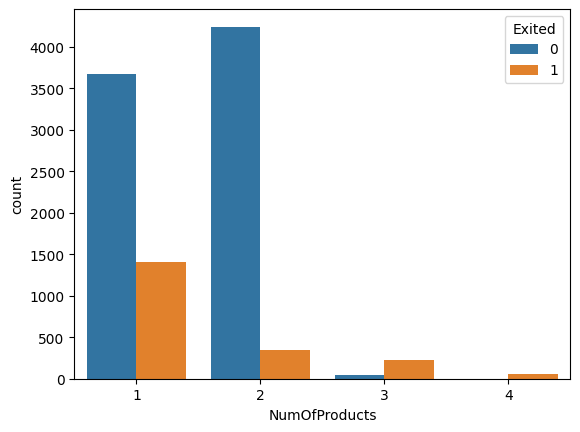

In [76]:
sns.countplot(x='NumOfProducts', hue='Exited', data=data)
plt.show()

Result : The bank offers customers 1, 2, 3 or 4 products, and as we guessed, the churn is much lower for customers who received more products than for customers who received fewer products. 

HasCreditCard :

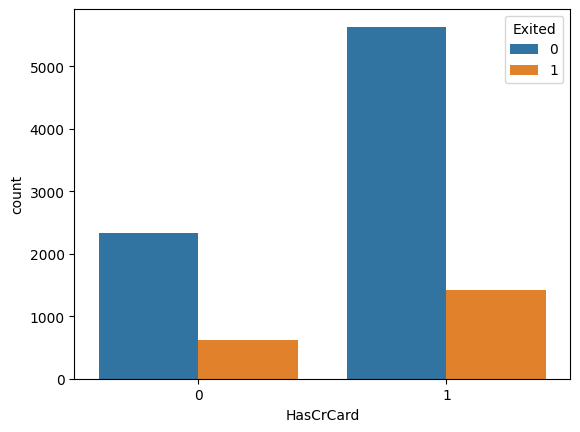

In [80]:
sns.countplot(x='HasCrCard', data=data, hue='Exited')
plt.show()

Result : most of the customers have credit card. Also, people who have a credit card had more exit from the bank.

IsActiveMember :

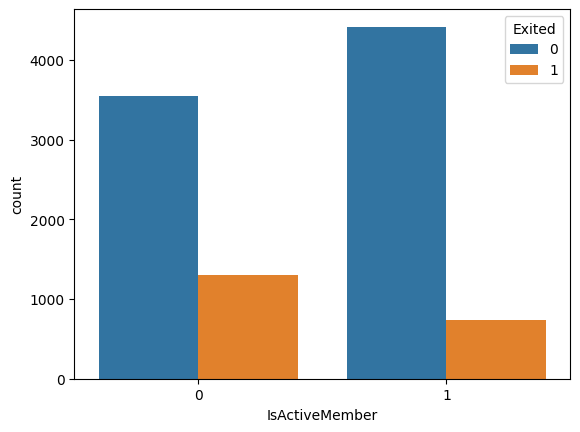

In [81]:
sns.countplot(x='IsActiveMember', hue='Exited', data=data)
plt.show()

Result : most of the customers are active. but a huge valume of churn belogs to inactive members.

How Estimated Salary effect on churn?

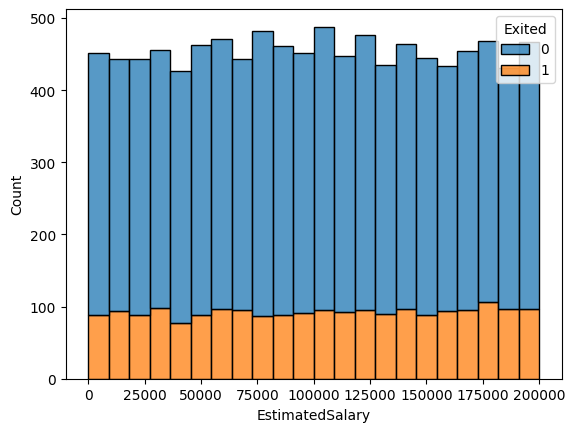

In [82]:
sns.histplot(data=data, x='EstimatedSalary', hue='Exited', multiple='stack')
plt.show()

Result : As we estimated, the amount of salary received by our clients is a wide range from 0$ to 200,000$ And as it is evident, the amount of salary received or income has no effect on the churn of customers.

In [7]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

##### We don't have any Not-A-Number(NaN) or missing values.

##### In order to be able to give the dataset to the model (although we haven't specified it yet), the values ​​of all the features must be numerical.
As you saw result of the cell 6, "Geography" and "Gender" are nominal (name and without order) features. we have two way change categorical features (they aren't numbers) into numerical features.
##### We have two main way: 1- OneHot Encoding 2- Labeling Encoding
##### Both of them are useful but when we face with nominal features (categorical without order) it's necessary to use OneHot Encoding. Because if we use Label Encoding, the order that occurs between the numbers will affect the training of the model and its subsequent predictions.

In [21]:
# cell 7
# Using OneHot Encoding:
# data = pd.get_dummies(data, dtype=np.int64)

In [22]:
label_ebcoder = LabelEncoder()
data['Geography'] = label_ebcoder.fit_transform(data['Geography'])
data['Gender'] = label_ebcoder.fit_transform(data['Gender'])

In [23]:
# cell 8
data.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4649,670,1,1,31,1,142631.54,2,1,1,175894.24,0
5466,850,1,1,32,3,137714.25,1,0,1,159403.68,0
3305,786,0,0,62,8,0.00,1,1,1,165702.64,0
6750,618,0,0,42,2,0.00,4,0,0,111097.39,1
1791,702,2,0,35,8,14262.80,2,1,0,54689.16,0
6256,609,0,1,37,1,39344.83,1,1,1,178291.89,1
5560,564,0,1,35,4,0.00,1,1,0,158937.55,0
3026,585,0,1,40,7,0.00,2,0,0,146156.98,0
6379,679,0,1,37,7,74260.03,1,1,0,194617.98,0
633,540,1,1,44,3,164113.04,2,1,1,12120.79,0


In [24]:
# cell 9
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [25]:
data.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##### As you see, now we have only 14 features for each person.
Notice that our customers are only from Germany, French and Spain.

##### Now I want to see which of the features are fully correlated. so that I can remove one of them to increase the learning speed of the model and its prediction also.
In this case we use correlation plot to examin that:

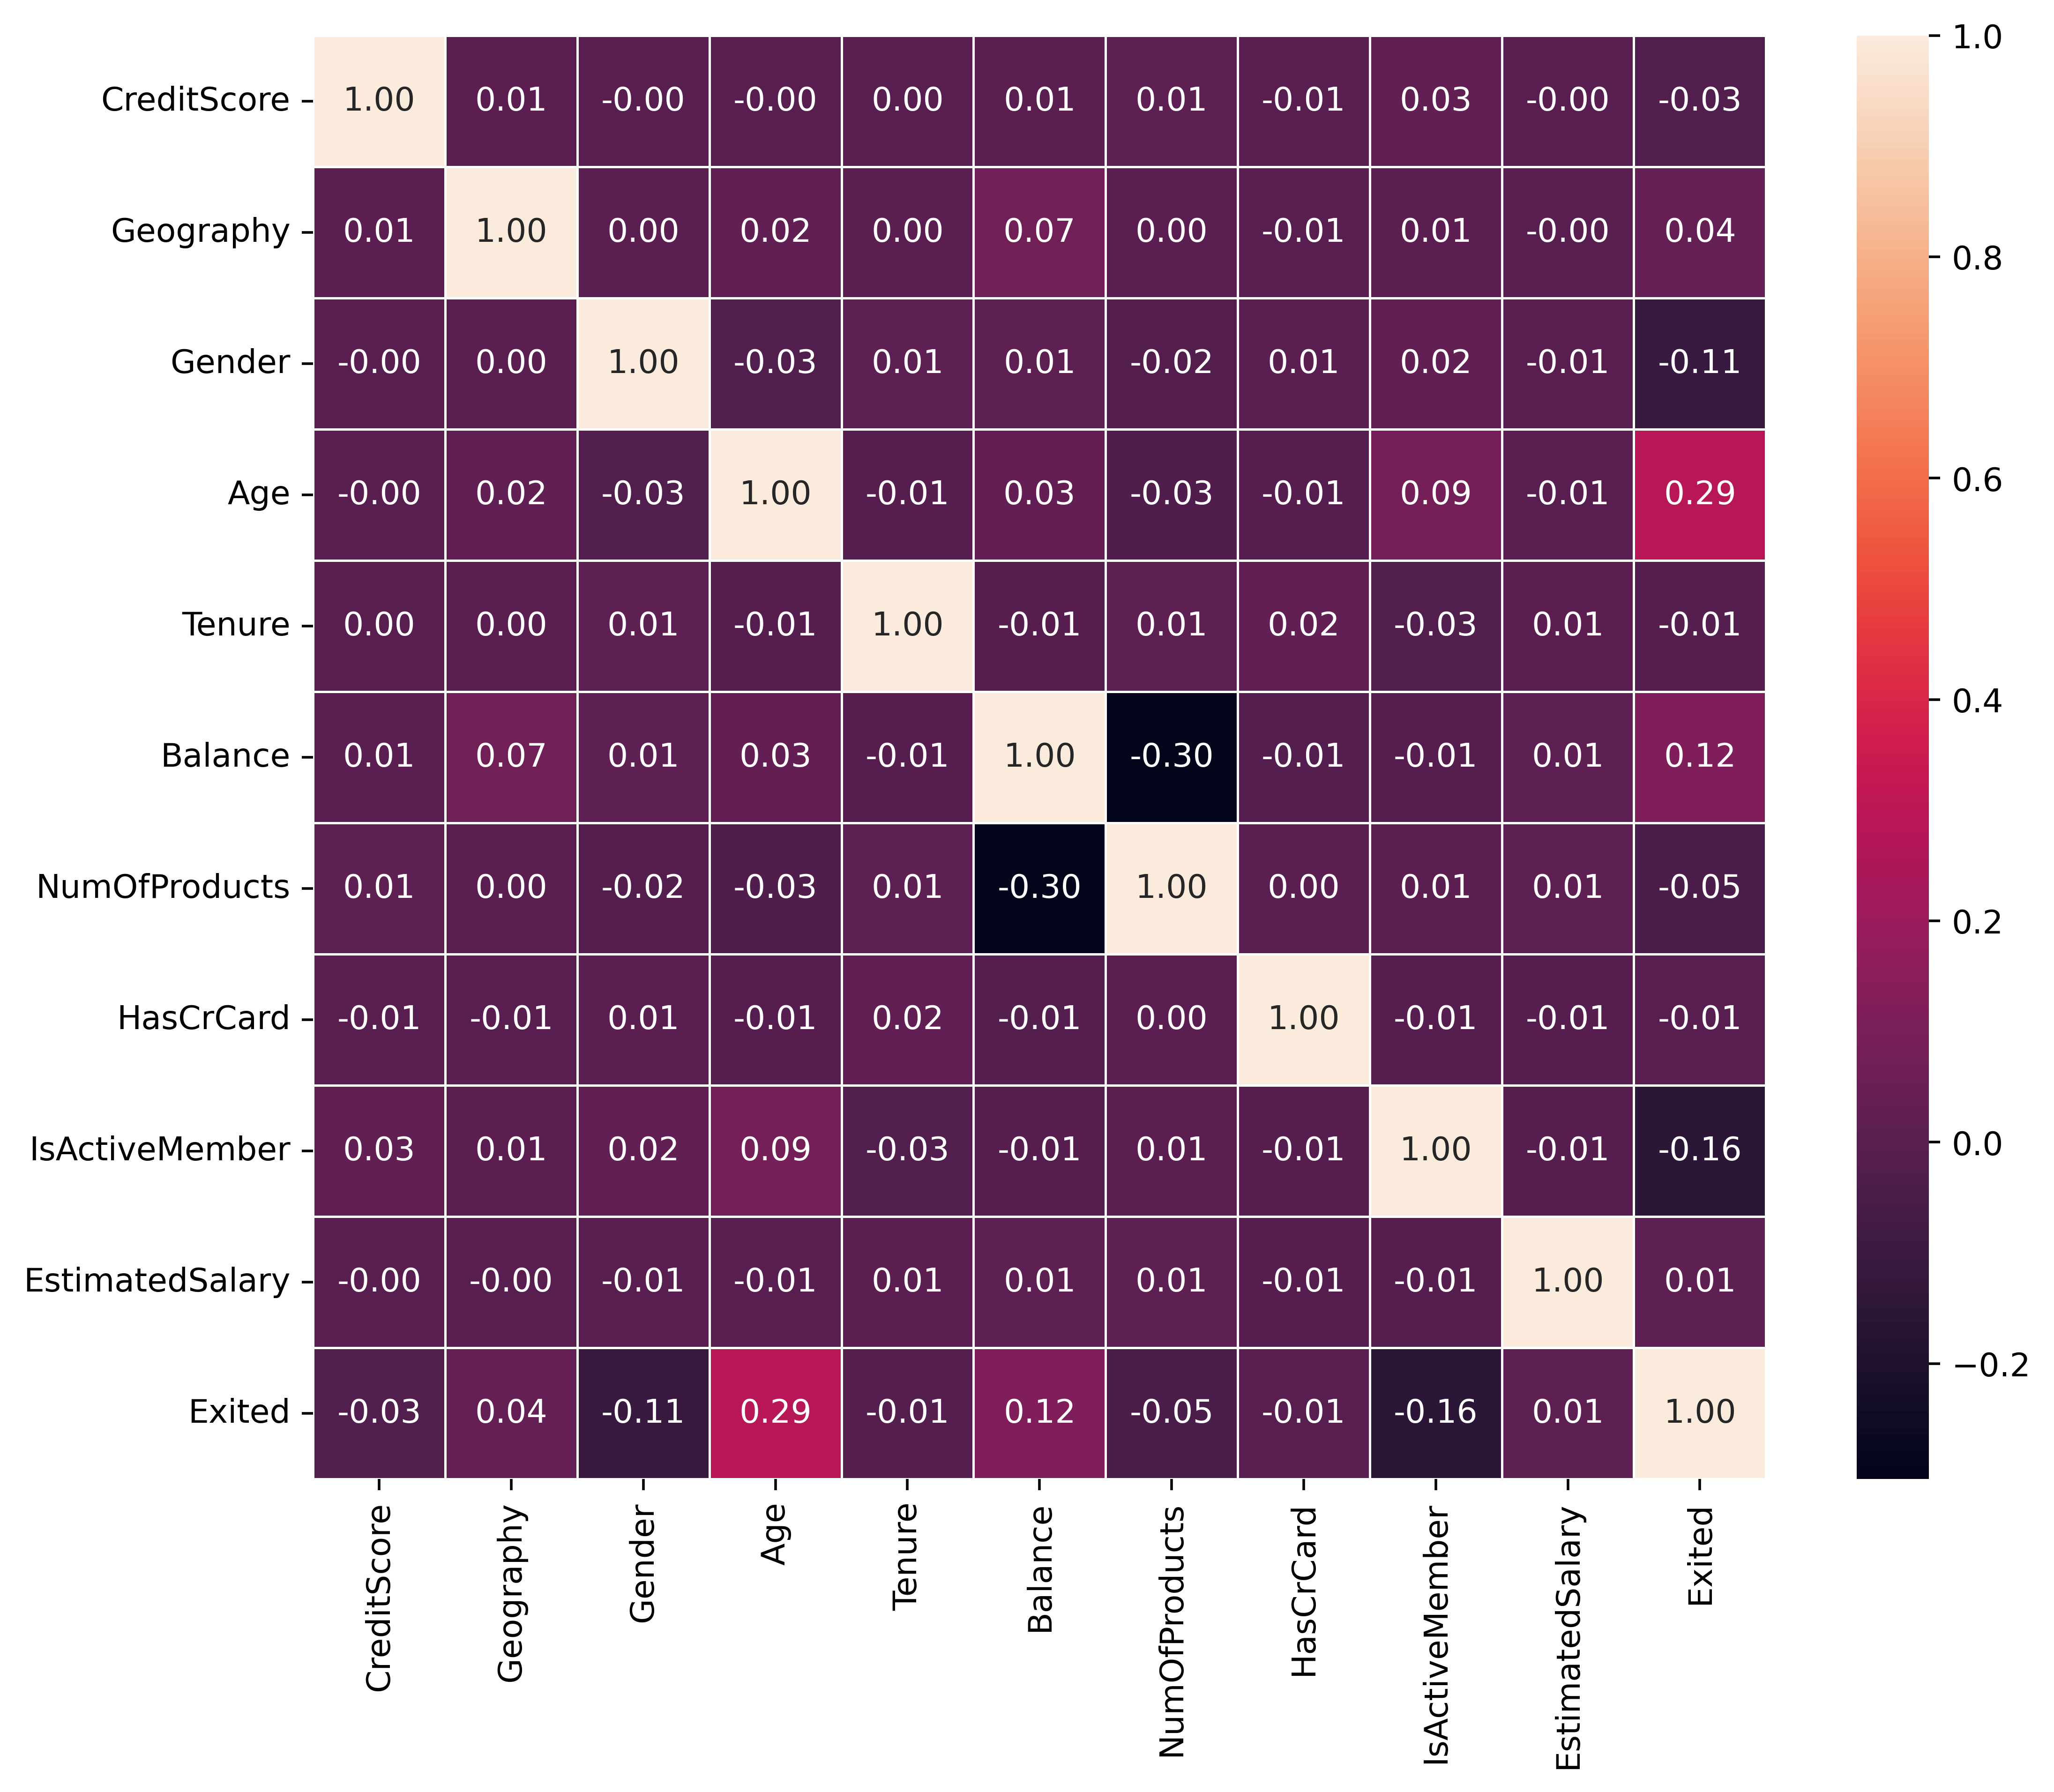

In [26]:
plt.figure(figsize=(10, 8), dpi=500)
sns.heatmap(data.corr(), annot=True, fmt=".2f", linewidth=.5)
plt.show()

In [27]:
# data.drop(['Gender_Female'], axis=1, inplace=True)

Checking is our data imbalanced or not?

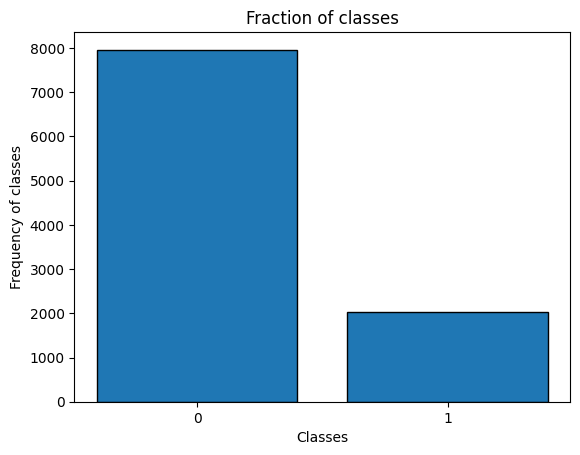

In [28]:
plt.hist(data['Exited'], bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.8)
plt.xticks([0,1])
plt.xlabel('Classes')
plt.ylabel('Frequency of classes')
plt.title("Fraction of classes")
plt.show()

As you see, number of zeros is about 8,000 and number of ones is about 2,000

##### Scaling

In [29]:
scaler = StandardScaler()
data[['CreditScore', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(data[['CreditScore', 'Balance', 'EstimatedSalary']])

In [30]:
# columns = ['CreditScore', 'Balance', 'EstimatedSalary']
# robust_scaler = RobustScaler().fit(data[['CreditScore', 'Balance', 'EstimatedSalary']])
# data[['CreditScore', 'Balance', 'EstimatedSalary']] = pd.DataFrame(robust_scaler.transform(data[['CreditScore', 'Balance', 'EstimatedSalary']]), columns=columns)

In [31]:
data.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1490,1.515505,2,0,31,8,-1.225848,2,1,0,0.309983,0
4586,-0.502117,0,0,25,0,-1.225848,2,1,1,0.020587,0
536,-0.119286,1,1,35,10,0.828409,2,1,0,-0.712894,0
1727,0.263545,2,0,36,4,-1.225848,2,1,1,-1.685289,0
28,-0.791826,1,0,43,3,1.039575,1,1,1,0.001690,0
9346,0.677416,0,1,41,9,-1.225848,1,1,1,0.229139,0
6491,0.377359,0,0,30,6,-1.225848,2,0,0,1.375760,0
2684,-0.791826,2,0,28,7,-1.225848,2,0,0,1.487978,0
7089,-0.160673,2,0,48,2,-1.225848,2,1,1,0.634021,0
589,-1.360899,2,0,47,6,1.295153,2,0,0,0.820555,1


##### Split data into Train and Test

In [32]:
X = data.drop(['Exited'], axis=1)
y = data['Exited']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

We have to balance our target classes

In [34]:
# smote = SMOTE(random_state=31)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [35]:
tomek = TomekLinks()
X_train, y_train = tomek.fit_resample(X_train, y_train)

##### Decision Tree

In [36]:
dtree = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2,4,6,8,10,12,14,16,18,20], 
              'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
              'random_state': [0, 42]}

grid_dtree = GridSearchCV(dtree, param_grid, cv=5, scoring='roc_auc')
grid_dtree.fit(X_train, y_train)

print(grid_dtree.best_params_)


{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 7, 'random_state': 42}


In [37]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=10, max_features=None, random_state=0)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=0)

We consider the maximum depth of 8 to avoid overfitting.

In [38]:
y_pred = dt_model.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred)

0.8465

In [40]:
# importances = dt_model.feature_importances_
# feature_names = data.columns.tolist()

# feature_iportance_dict = {feature: importance for feature, importance in zip(feature_names, importances)}
# dict(sorted(feature_iportance_dict.items(), key=lambda item: item[1], reverse=True))

##### Using RandomForest

In [41]:
rfc = RandomForestClassifier()

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2,4,6,8,10], 
              'min_samples_leaf': [2,4,6,8,10],
              'random_state': [0, 42]}

grid_rfc = GridSearchCV(rfc, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_rfc.fit(X_train, y_train)

print(grid_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'random_state': 0}


In [42]:
rf_model = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2, random_state=0)

rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       random_state=0)

In [45]:
rf_model.score(X_train, y_train)

0.8976554267650158

In [43]:
y_pred_random = rf_model.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred_random)

0.8485

In [46]:
confusion_matrix(y_test, y_pred_random)

array([[1517,   76],
       [ 227,  180]])

In [49]:
classification_report(y_test, y_pred_random)

'              precision    recall  f1-score   support\n\n           0       0.87      0.95      0.91      1593\n           1       0.70      0.44      0.54       407\n\n    accuracy                           0.85      2000\n   macro avg       0.79      0.70      0.73      2000\nweighted avg       0.84      0.85      0.83      2000\n'